## Copy this notebook (if using Colab) via `File -> Save a Copy in Drive`.

## You can do this assignment outside of Colab (using your local Python installation) via `File -> Download`.

## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u>

## *Please answer questions within their designated section and in the order they are asked to maintain clarity and organization. You can add new code and text blocks if you want.*

## **Setup** 🔧

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# First mount your drive before running these cells.
# Create a folder for the this HW and change to that dir
%cd drive/MyDrive/masters/CSE519

/content/drive/MyDrive/masters/CSE519


# Download data from Kaggle 📥

In [ ]:
!pip install -q kaggle

In [ ]:
# Go to your Kaggle account and navigate to your account settings (click on your profile picture -> "Account").
# Scroll down to the "API" section and click "Create New API Token." This will download a kaggle.json file containing your API key.
# In your Colab notebook, run the following code to upload the kaggle.json file
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d dgawlik/nyse

# Alternate: download data using gdown (if having issues with Kaggle) 📁

In [ ]:
!pip install gdown

In [ ]:
# change
import gdown
url = 'https://drive.google.com/uc?id=1Z2raUyVZpAyICdv193t22YCT5bS9oEba'
gdown.download(url)

# Extract data and install packages (regardless of data acquisition method) 🚀

In [ ]:
!unzip nyse.zip

Archive:  nyse.zip
replace fundamentals.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
### TODO: Install required packages
### Student's code here
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn
### END

^C


## **Library and Data Imports**
- Import your libraries and the data here

In [ ]:
### TODO: Load required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
###

## **Q1: Market Entry and Exit Dynamics Analysis (10 Points)**
Identify which companies in the dataset entered after data collection started (presumably new companies) and which left the exchange before the end date for data collection (perhaps going bankrupt)

In [ ]:
def market_entry_exit():
  df = pd.read_csv("prices.csv")

  # Handle the case with the date followed by time
  # df['date'] = pd.to_datetime(df['date'], format='mixed')

  # df['date'] = df['date'].dt.date

  df = df.sort_values(by='date')

  start_date = df['date'].min()
  end_date = df['date'].max()

  company_first_seen = df.groupby('symbol')['date'].min()
  company_last_seen = df.groupby('symbol')['date'].max()



  new_companies = company_first_seen[company_first_seen > start_date].index.tolist()
  left_companies = company_last_seen[company_last_seen < end_date].index.tolist()

  return {
      'start_date': start_date,
      'end_date': end_date,
      'new_companies': new_companies,
      'left_companies': left_companies
  }

result = market_entry_exit()

print(f"Data collection started on: {result['start_date']}")
print(f"Data collection ended on: {result['end_date']}")
print(f"Companies that entered after the start: {result['new_companies']}")
print(f"Companies that left before the end: {result['left_companies']}")

Data collection started on: 2010-01-04
Data collection ended on: 2016-12-30 00:00:00
Companies that entered after the start: ['ABBV', 'AIV', 'ALLE', 'CFG', 'CHTR', 'COTY', 'CSRA', 'DLPH', 'EVHC', 'FB', 'FBHS', 'FTV', 'GM', 'HCA', 'HPE', 'KHC', 'KMI', 'KORS', 'LYB', 'MNK', 'MPC', 'NAVI', 'NLSN', 'NWS', 'NWSA', 'PSX', 'PYPL', 'QRVO', 'SYF', 'TDG', 'TRIP', 'WLTW', 'WRK', 'XYL', 'ZTS']
Companies that left before the end: ['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET', 'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN', 'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX', 'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH', 'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CE


Data collection started on: 2010-01-04

Data collection ended on: 2016-12-30

Companies that entered after the start: ['ABBV', 'AIV', 'ALLE', 'CFG', 'CHTR', 'COTY', 'CSRA', 'DLPH', 'EVHC', 'FB', 'FBHS', 'FTV', 'GM', 'HCA', 'HPE', 'KHC', 'KMI', 'KORS', 'LYB', 'MNK', 'MPC', 'NAVI', 'NLSN', 'NWS', 'NWSA', 'PSX', 'PYPL', 'QRVO', 'SYF', 'TDG', 'TRIP', 'WLTW', 'WRK', 'XYL', 'ZTS']

Companies that left before the end: []

## **Q2: Ranking and Sampling (10 Points)**
Order the companies by how big/interesting/important they are, so we can restrict    analysis to the top n companies to work with to keep future computations reasonable.  Describe what ranking feature you think best here and why, and what n works for you for future analysis **given your limited compute environment**.

In [ ]:

def ranking_and_sampling(n):
    fundamentals_df = pd.read_csv('fundamentals.csv')

    fundamentals_df['Total Revenue'] = pd.to_numeric(fundamentals_df['Total Revenue'], errors='coerce')
    fundamentals_df_unique = fundamentals_df.drop_duplicates(subset='Ticker Symbol')

    fundamentals_df_sorted = fundamentals_df_unique.sort_values(by='Total Revenue', ascending=False)
    top_n_companies = fundamentals_df_sorted.head(n)

    return top_n_companies[['Ticker Symbol', 'Total Revenue']]

top_n_companies = ranking_and_sampling(10)

print(top_n_companies)


     Ticker Symbol  Total Revenue
1706           WMT   4.686510e+11
1745           XOM   4.515090e+11
420            CVX   2.305900e+11
1312           PSX   1.792900e+11
8             AAPL   1.709100e+11
700             GM   1.554270e+11
608              F   1.469170e+11
1638           VLO   1.383930e+11
1494             T   1.274340e+11
416            CVS   1.267610e+11


Discussion for Q2:
After doing some research on what the columns meant, I believe After Tax ROE found in the fundamentals.csv file is the best one to use. The return on equity after tax measures how profitable a company is with respect to the stockholders equity. Therefore, a higher ROE means a company is more efficient at generating profit from its assets.

After trying After Tax ROE, I found that the stocks that were first don't really make sense as they are companies I haven't heard before. I am attempting to try a different one now and I have settled on using the sum of Accounts Receivable, Accounts Payable and Capital Surplus. Although accounts receivable is money a company owes to vendors, it still is a representation of how much cash flow is going through the comapny. Accounts payable is how much money vendors owe the company. Capital Surplus represents how much extra money a company has after paying off its debts.

I then found out that fundamentals has way more columns than just the 10 columns that are displayed on Kaggle, so I decided to use total revenue as the factor that shows how strong a company is.

## **Q3: Stock Split Analysis (15 Points)**
There are two datafiles, one with raw prices, the other adjusted by stock splits.   Compare the pre-and-post split files to see if you can identify the dates/companies of the roughly 140 stock splits and what the ratio of each of the splits were.

In [ ]:

def stock_split_analysis():
    # Load the datasets
    df_prices = pd.read_csv('prices.csv')
    df_splits = pd.read_csv('prices-split-adjusted.csv')

    merged_df = pd.merge(df_prices, df_splits, on=['date', 'symbol'], suffixes=('_orig', '_adj'))

    merged_df['split_ratio'] = round(merged_df['open_orig'] / merged_df['open_adj'], 5)

    split_stocks = merged_df[merged_df['split_ratio'] != 1]

    split_stocks = split_stocks[['symbol', 'date', 'open_orig', 'open_adj', 'split_ratio']]

    unique_splits = split_stocks.drop_duplicates(subset=['symbol', 'split_ratio'], keep= 'first')

    return unique_splits

result = stock_split_analysis()
print(result)


       symbol        date   open_orig    open_adj  split_ratio
0           A  2010-01-04   31.389999   22.453504      1.39800
3        AAPL  2010-01-04  213.429998   30.490000      7.00000
5         ABT  2010-01-04   54.189953   26.000339      2.08420
10        ADP  2010-01-04   43.540000   38.226514      1.13900
24        ALK  2010-01-04   34.820000    8.705000      4.00000
...       ...         ...         ...         ...          ...
260486    ALK  2012-03-19   34.889999   17.445000      2.00000
285640    OKE  2012-06-04   39.829998   34.871299      1.14220
351758    NKE  2012-12-26   52.049999   26.024999      2.00000
353625    MPC  2013-01-02   64.150002   32.075001      2.00000
504255   GOOG  2014-03-27  568.002570  566.447389      1.00275

[130 rows x 5 columns]


In [ ]:
# Generated Text
#        symbol        date   open_orig    open_adj  split_ratio
# 0           A  2010-01-04   31.389999   22.453504      1.39800
# 3        AAPL  2010-01-04  213.429998   30.490000      7.00000
# 5         ABT  2010-01-04   54.189953   26.000339      2.08420
# 10        ADP  2010-01-04   43.540000   38.226514      1.13900
# 24        ALK  2010-01-04   34.820000    8.705000      4.00000
# ...       ...         ...         ...         ...          ...
# 260486    ALK  2012-03-19   34.889999   17.445000      2.00000
# 285640    OKE  2012-06-04   39.829998   34.871299      1.14220
# 351758    NKE  2012-12-26   52.049999   26.024999      2.00000
# 353625    MPC  2013-01-02   64.150002   32.075001      2.00000
# 504255   GOOG  2014-03-27  568.002570  566.447389      1.00275

# [130 rows x 5 columns]

[link text](https://)Discussion for Q3: \[Write here \]

I looked for all stocks that have different values from the prices.csv file and the prices-split-adjusted.csv file and calculated the ratio at which they are different. I only saved values that were not equal to 1 which mean that both reverse stock splits and normal stock splits were accounted for. This information is then saved as a differnt column that keeps the unique splits and split ratios keeping only the first instance of where the split is observed.

## **Q4: Pairs Trading Strategy and Correlation Analysis (20 Points)**
Pairs trading is an investment strategy which relies on identifying pairs of stocks which move in the same direction each day – if stock A goes up (down) on a given day, then stock B likely goes up (down) the same day.   So:

<ol type="a">
 <li>Construct an appropriate daily time series for each stock reflecting how much it goes up or down each day.</li>
 <li>Construct a pairwise correlation matrix measuring how in sync these movements are among all pairs of your n top stocks.   Present this pairwise correlation matrix in a way to make its lesson as clear as possible to the viewer.</li>
 <li>Identify which pairs are most and least strongly correlated in their movements, and propose some reasonable explanations why this is the case.</li>
 <li> The 'securities.csv' file contains the economic sector which each company participates in.  Do companies within the same economic sector have stronger or weaker price correlations than those in different sectors? </li>
</ol>



### **Part a**

In [ ]:
def stock_daily_percent_change():
    df_prices = pd.read_csv('prices-split-adjusted.csv')

    # df_prices['date'] = pd.to_datetime(df_prices['date'])
    df_prices = df_prices.sort_values(by=['symbol', 'date'])

    df_prices['daily_pct_change'] = df_prices.groupby('symbol')['close'].pct_change() * 100

    return df_prices[['symbol', 'date', 'close', 'daily_pct_change']]



###**Part b**

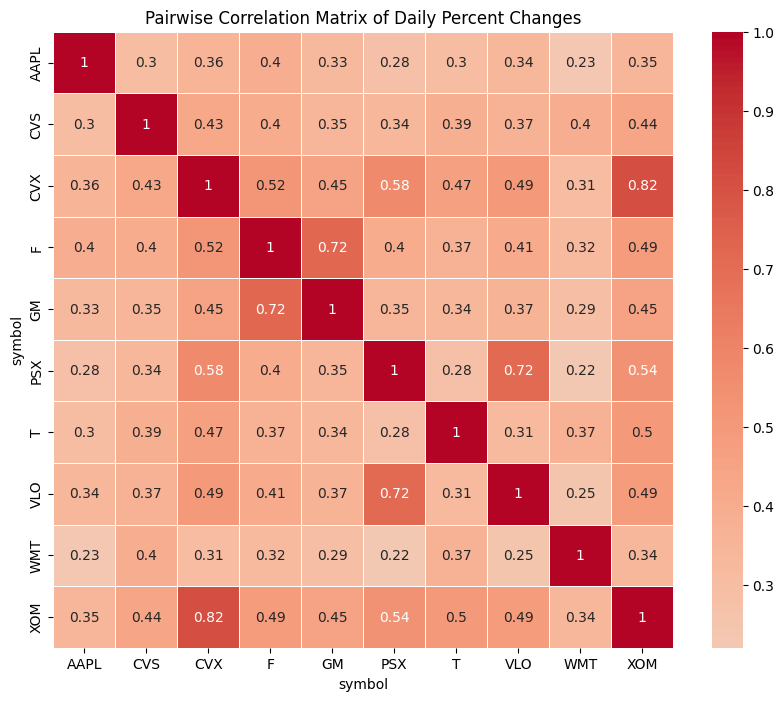

In [ ]:
top_n = ranking_and_sampling(10)

def pairwise_correlation_matrix(top_n_companies):
    top_n_symbols = top_n_companies['Ticker Symbol'].tolist()

    df_prices = stock_daily_percent_change()
    df_filtered = df_prices[df_prices['symbol'].isin(top_n_symbols)]

    df_pivot = df_filtered.pivot_table(index='date', columns='symbol', values='daily_pct_change')
    correlation_matrix = df_pivot.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
    plt.title('Pairwise Correlation Matrix of Daily Percent Changes')
    plt.show()

# Example usage
pairwise_correlation_matrix(top_n)


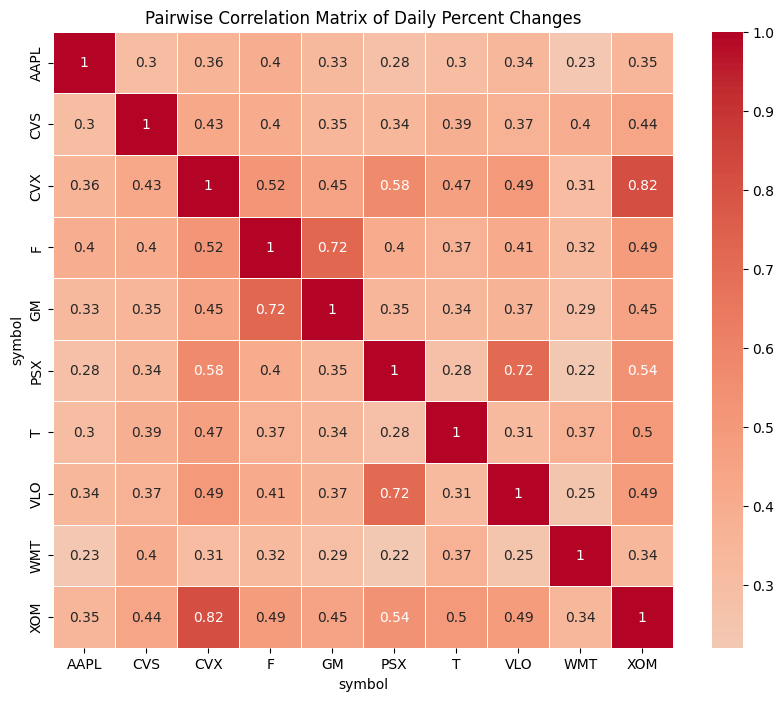

I used my ranking and sampling function to retrieve the top 10 stocks based off of my sampling features. I then made sure to filter my data frame with just stocks that were in this array of top n stocks and I pivoted the table such that the index was the date and the columns were the stock sybols. The values were the daily percent change. I did this to construct a correlation matrix and I used sns.heatmap feature to display the results in a nice and constructed manner.

I also found XOM and CVX had a very high correlation which makes sense as these are both gas companies

### **Part c**

In [ ]:
def stock_top_n_correlated_pairs(n=5):
    df_prices = stock_daily_percent_change()

    pivot_df = df_prices.pivot(index='date', columns='symbol', values='daily_pct_change')

    correlation_matrix = pivot_df.corr()

    corr_pairs = correlation_matrix.unstack().dropna()

    corr_pairs = corr_pairs[corr_pairs != 1]

    sorted_corr_pairs = corr_pairs.sort_values(ascending=False)

    ##BEGIN[ChatGPT GPT-4][https://chat.openai.com/auth/login]"My previous code + this gives me AAPL, GOOGL and GOOGL AAPL right after. Make sure I get rid of these that represent the same information."

    unique_pairs = sorted_corr_pairs[sorted_corr_pairs.index.map(lambda x: x[0] < x[1])]

    #END[ChatGPT]

    top_n_most_correlated = unique_pairs.head(n)
    top_n_least_correlated = unique_pairs.tail(n)

    return top_n_most_correlated, top_n_least_correlated


top_n_most_correlated, top_n_least_correlated = stock_top_n_correlated_pairs(n=6)

print("Top N Most Correlated Pairs:\n", top_n_most_correlated)
print("\nTop N Least Correlated Pairs:\n", top_n_least_correlated)


Top N Most Correlated Pairs:
 symbol  symbol
GOOG    GOOGL     0.995716
FOX     FOXA      0.973784
NWS     NWSA      0.963088
DISCA   DISCK     0.951051
MET     PRU       0.877361
BXP     VNO       0.874054
dtype: float64

Top N Least Correlated Pairs:
 symbol  symbol
CSRA    DUK      -0.100071
CFG     O        -0.129528
CSRA    SO       -0.136280
CFG     ED       -0.145611
CSRA    ED       -0.152866
FTV     MCK      -0.180920
dtype: float64


In [ ]:
# Generated Text
# Top N Most Correlated Pairs:
#  symbol  symbol
# GOOG    GOOGL     0.995716
# FOX     FOXA      0.973784
# NWS     NWSA      0.963088
# DISCA   DISCK     0.951051
# MET     PRU       0.877361
# BXP     VNO       0.874054
# dtype: float64

# Top N Least Correlated Pairs:
#  symbol  symbol
# CSRA    DUK      -0.100071
# CFG     O        -0.129528
# CSRA    SO       -0.136280
# CFG     ED       -0.145611
# CSRA    ED       -0.152866
# FTV     MCK      -0.180920
# dtype: float64

Explanations for part c: \[Write here\]

I used the corr() function to compute the correlation matrix of stocks based off of the daily percent changes of stocks. Self correlation of the stock was removed and we sort the results and extract from the head and the tail.

Extra processing was done to make sure the correlations returned did not consist of repeated information. I wasn't sure how to do this so I prompted Chat GPT to remove the extra information. What Chat GPT gave me was some code that finds pairs where the first value is alphabetically smaller than the second which worked for me and was a smart way of retrieving this information.

### **Part d**

Average Intra-Sector Correlation: 0.4859
Average Inter-Sector Correlation: 0.3522


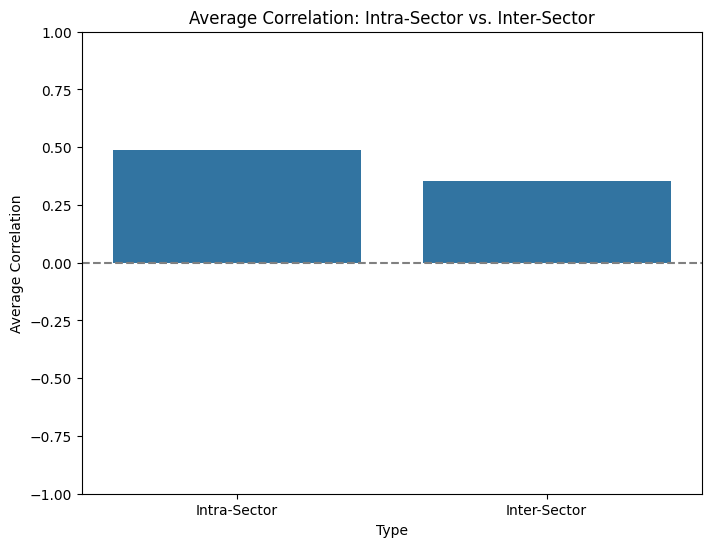

In [ ]:
import matplotlib.pyplot as plt

def analyze_sector_correlations():
    df_prices = pd.read_csv('prices-split-adjusted.csv')
    df_securities = pd.read_csv('securities.csv')

    df_prices['daily_pct_change'] = df_prices.groupby('symbol')['close'].pct_change() * 100

    df_securities = df_securities[['Ticker symbol', 'GICS Sector']].rename(columns={'Ticker symbol': 'symbol'})
    df_merged = pd.merge(df_prices, df_securities, on='symbol', how='inner')

    df_pivot = df_merged.pivot_table(index='date', columns='symbol', values='daily_pct_change')

    correlation_matrix = df_pivot.corr()

    sector_correlations = []

    for symbol_a in correlation_matrix.columns:
        for symbol_b in correlation_matrix.columns:
            if symbol_a != symbol_b:
                corr_value = correlation_matrix.loc[symbol_a, symbol_b]
                sector_a = df_securities.loc[df_securities['symbol'] == symbol_a, 'GICS Sector'].values[0]
                sector_b = df_securities.loc[df_securities['symbol'] == symbol_b, 'GICS Sector'].values[0]

                sector_correlations.append({
                    'Sector A': sector_a,
                    'Sector B': sector_b,
                    'Correlation': corr_value
                })

    df_correlations = pd.DataFrame(sector_correlations)

    avg_correlations = df_correlations.groupby(['Sector A', 'Sector B']).agg(
        avg_correlation=('Correlation', 'mean'),
        count=('Correlation', 'size')
    ).reset_index()

    avg_intra = avg_correlations[avg_correlations['Sector A'] == avg_correlations['Sector B']]
    avg_inter = avg_correlations[avg_correlations['Sector A'] != avg_correlations['Sector B']]

    avg_intra_corr = avg_intra['avg_correlation'].mean()
    avg_inter_corr = avg_inter['avg_correlation'].mean()

    print(f"Average Intra-Sector Correlation: {avg_intra_corr:.4f}")
    print(f"Average Inter-Sector Correlation: {avg_inter_corr:.4f}")


    graph_data = {
        'Type': ['Intra-Sector', 'Inter-Sector'],
        'Average Correlation': [avg_intra_corr, avg_inter_corr]
    }
    df_summary = pd.DataFrame(graph_data)

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Type', y='Average Correlation', data=df_summary)
    plt.title('Average Correlation: Intra-Sector vs. Inter-Sector')
    plt.ylim(-1, 1)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()

analyze_sector_correlations()


Insights from part d: \[Write here\]

Average Intra-Sector Correlation: 0.4859
Average Inter-Sector Correlation: 0.3522

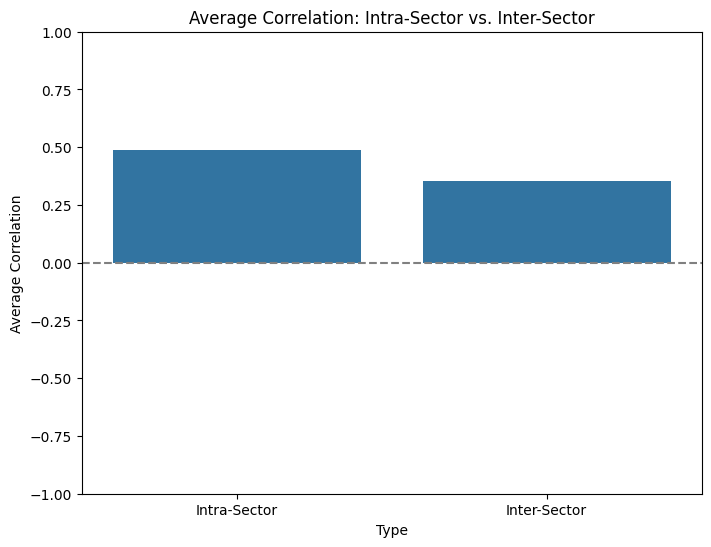

This function does take a while to run as its a double for loop.

We look at the daily percent changes of the stocks and we pivot it such that the index is date, columns are symbol, values are the daily percent change. A correlation matrix is then calculated between the different stock symbols.

I then check every stock in the correlation matrix and record the information based off of what sector it is in as well as the sector of the stock it is being compared to. After doing so, I then group the correlations based off if they are the same sector vs the different sector and I find the mean value of the average correlation.

I visualize the results in a bar plot and I limit its constraints to adjust for possible values (it can't be great than 1 or less than -1).

I ended up finding that stocks in the same sector are generally more correlated than inter-sector which makes sense in our case. I was expecting the difference to be much higher but this can be attributed to the fact that all of these stocks are bigger and move with the market.




## **Q5: Distribution of Daily Price Movements  (10 Points)**
Plot the distributions of frequency of daily price movements according to your statistic.   What type of classical distribution does this look like, and are there any surprising deviations from the theoretical distribution?

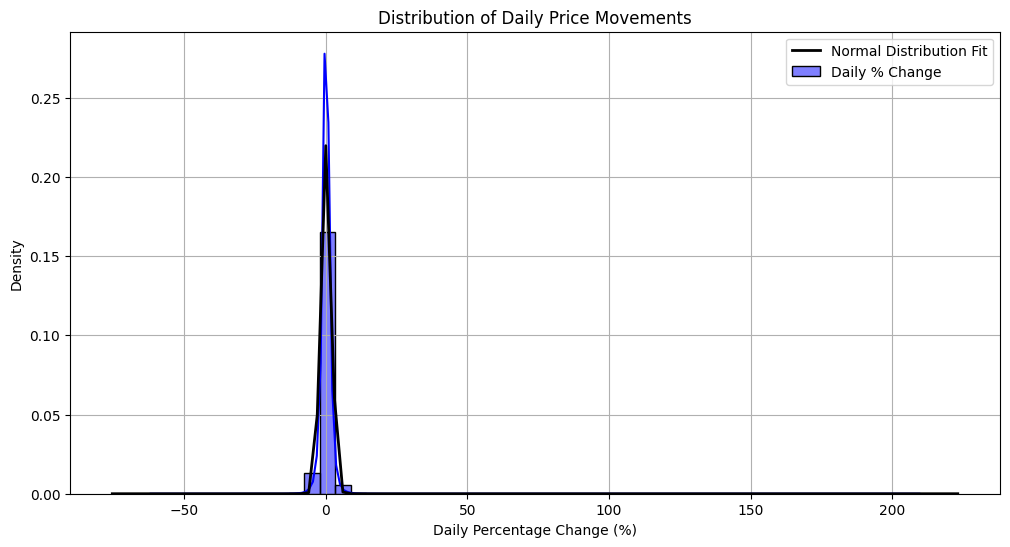

Mean: 0.05923359900683788
Standard Deviation: 1.8127450010478847
Minimum Daily Percent Change: -61.89337978037869%
Stock with Maximum Daily Percent Change: EVHC on 2016-12-02 with 209.61029229406557%


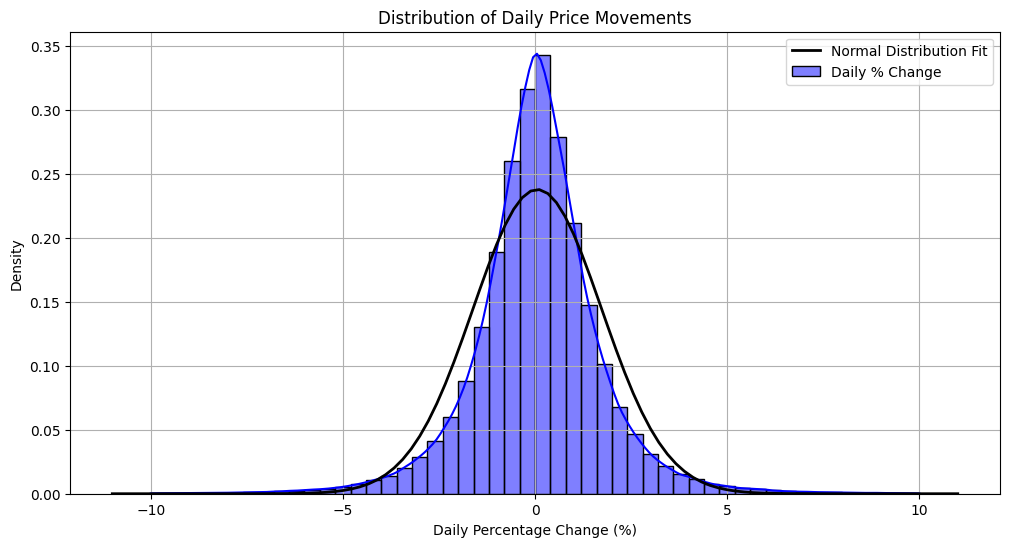

In [ ]:
import scipy.stats as stats

def plot_daily_price_movements_distribution():
    df_prices = stock_daily_percent_change()

    df_prices = df_prices[np.isfinite(df_prices['daily_pct_change'])]
    plt.figure(figsize=(12, 6))
    sns.histplot(df_prices['daily_pct_change'], bins=50, kde=True, color='blue', stat='density', label='Daily % Change')

    mu, std = stats.norm.fit(df_prices['daily_pct_change'])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution Fit')
    plt.title('Distribution of Daily Price Movements')
    plt.xlabel('Daily Percentage Change (%)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid()
    plt.show()

    # I print some statistics here to see where I am finding errors.

    print(f"Mean: {df_prices['daily_pct_change'].mean()}")
    print(f"Standard Deviation: {df_prices['daily_pct_change'].std()}")
    print(f"Minimum Daily Percent Change: {df_prices['daily_pct_change'].min()}%")
    max_change_stock = df_prices.loc[df_prices['daily_pct_change'].idxmax()]
    print(f"Stock with Maximum Daily Percent Change: {max_change_stock['symbol']} on {max_change_stock['date']} with {max_change_stock['daily_pct_change']}%")

    # I adjusted the window to be 10 here to check if it was a better visualization
    df_prices = df_prices[(df_prices['daily_pct_change'] >= -10) & (df_prices['daily_pct_change'] <= 10)]

    plt.figure(figsize=(12, 6))
    sns.histplot(df_prices['daily_pct_change'], bins=50, kde=True, color='blue', stat='density', label='Daily % Change')

    mu, std = stats.norm.fit(df_prices['daily_pct_change'])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution Fit')
    plt.title('Distribution of Daily Price Movements')
    plt.xlabel('Daily Percentage Change (%)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid()
    plt.show()



plot_daily_price_movements_distribution()


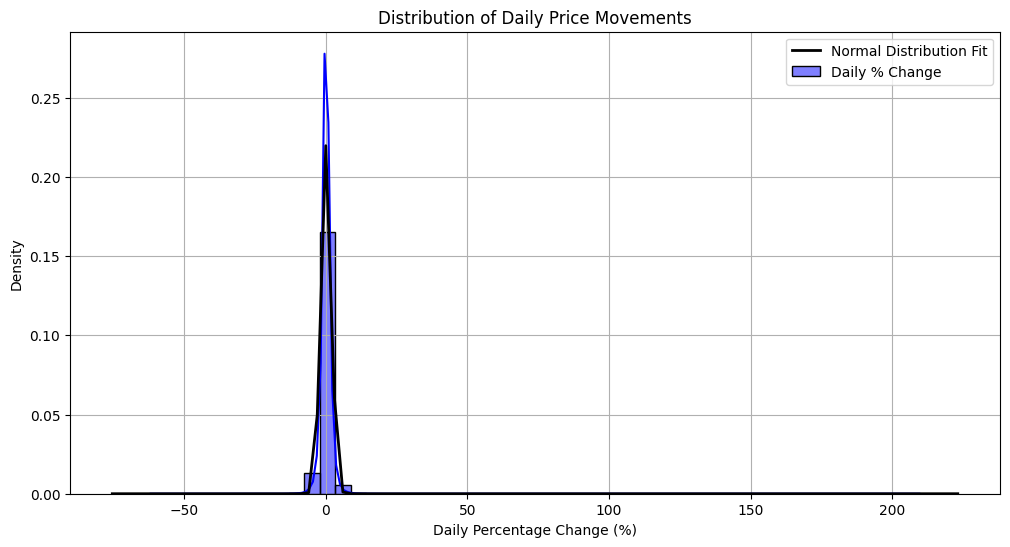

In [ ]:
# Mean: 0.05923359900683788
# Standard Deviation: 1.8127450010478847
# Minimum Daily Percent Change: -61.89337978037869%
# Stock with Maximum Daily Percent Change: EVHC on 2016-12-02 with 209.61029229406557%

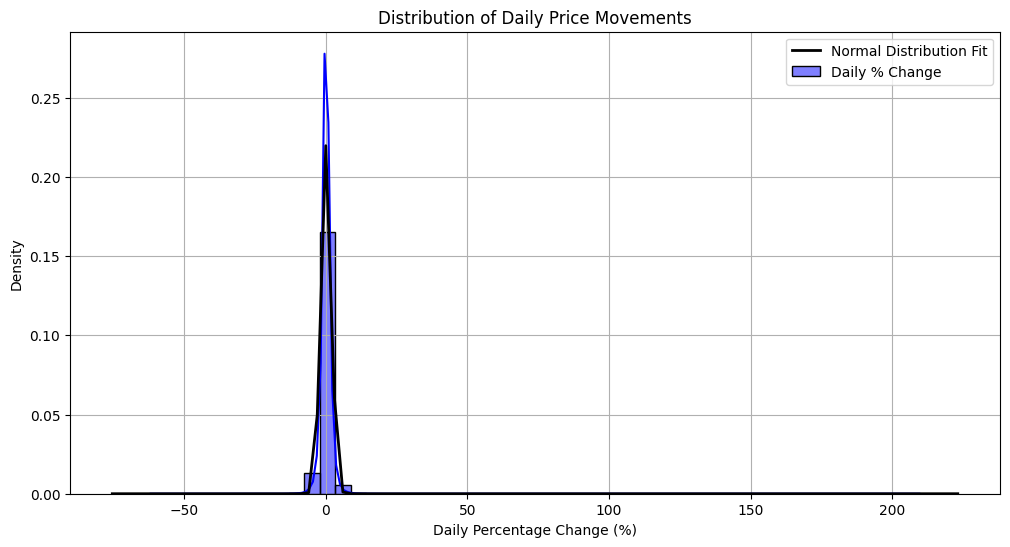

Answer for Q5:
Initially I got a chart that looked very stretched out, and I presumed it to be because of outliers. Upon further analysis, I was right and discovered that LVLT had a crazy percent change of about 1390% increase. This gave me a chart that was pretty much useless, as I could barely see what majority of the stocks looked like. I decided to change the bounds of my chart to -10 and 10

This very much looks like a normal distribution when limited to the bounds of [-10, 10] percent change. This makes sense as most stocks do not change that severely (especially bigger stocks). If given a dataset full of penny stocks, I would have expected the percent changes to be much more erratic and not follow a normal distribution.

After further work, I realized that I should have used the stock-adjusted prices. The percent changes were heavily inflated because the data analysis was done on data that was not a good representation of how much a stock changed. The highest percent change is now 200% which is still high but not as crazy as 1390%.

## **Q6: Exploratory Data Analysis (15 Points)**
Create three plots of your own using the dataset that you think reveal something very interesting. Explain what it is, and anything else you learned from your exploration.

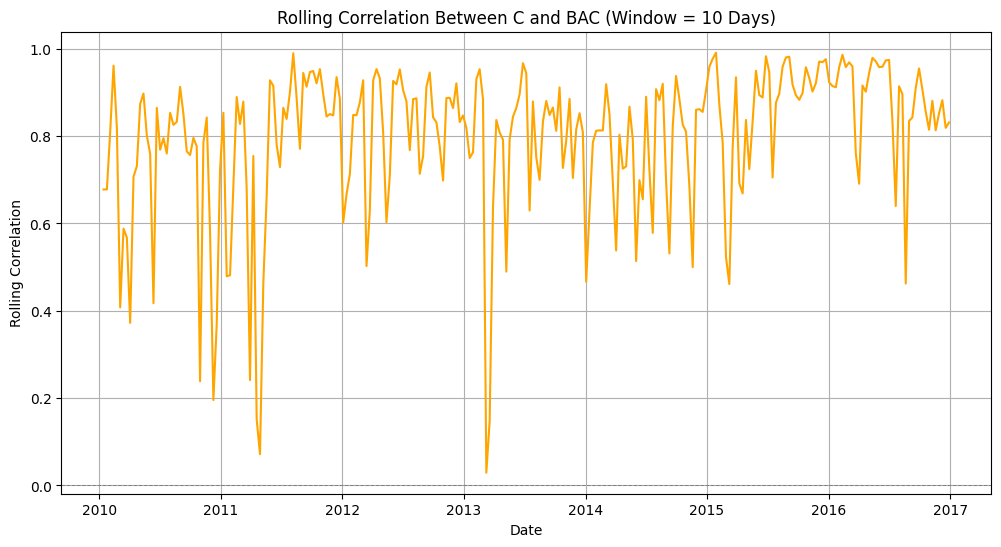

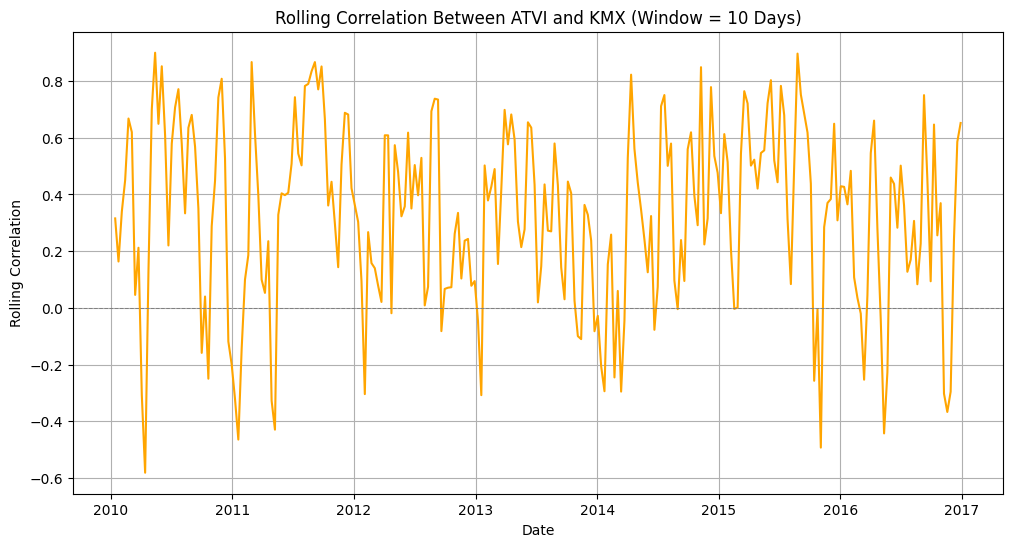

In [ ]:
def plot_rolling_correlation(stock1, stock2, window=10):
    df_prices = stock_daily_percent_change()

    # Only keep the two stocks we are interested in
    df_filtered = df_prices[df_prices['symbol'].isin([stock1, stock2])]

    df_pivot = df_filtered.pivot(index='date', columns='symbol', values='daily_pct_change')

    # Convert to date time for the rolling window
    df_pivot.index = pd.to_datetime(df_pivot.index)
    rolling_corr = df_pivot[stock1].rolling(window=window).corr(df_pivot[stock2])

    # We have to resample to get a certain window that we are looking at
    rolling_corr_resampled = rolling_corr.resample(f'{window}D').mean()

    plt.figure(figsize=(12, 6))
    plt.plot(rolling_corr_resampled.index, rolling_corr_resampled, color='orange')
    plt.title(f'Rolling Correlation Between {stock1} and {stock2} (Window = {window} Days)')
    plt.ylabel('Rolling Correlation')
    plt.xlabel('Date')
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
    plt.grid(True)
    plt.show()

# Example usage
plot_rolling_correlation('C', 'BAC', window=10)
plot_rolling_correlation('ATVI', 'KMX', window=10)





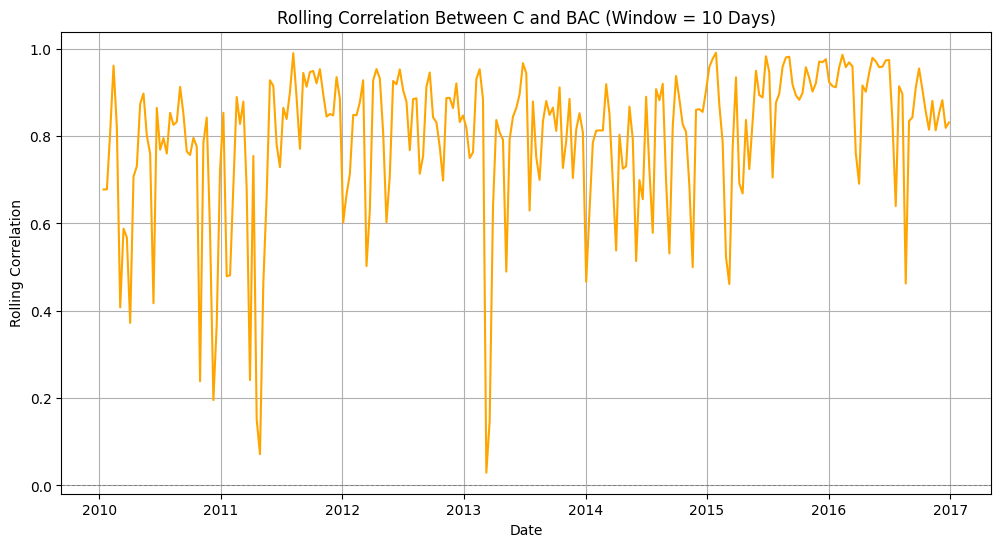

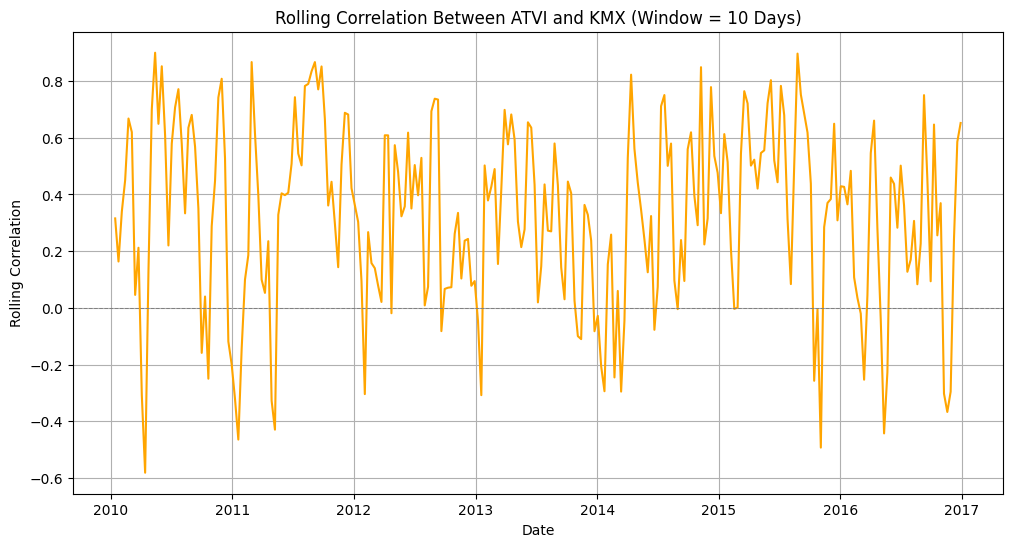

I implemented this chart to find out if stocks are related to each other or not. A rolling correlation represents how well stocks are correlated at different dates, where a 1 means positively correlated, a 0 means no correlations, and a -1 means negatively correlated. I checked my function with some stocks and I found results that made sense.


I found that the rolling correlation of Bank of America and Citigroup stock typically hovered in the high 0.8-1.0 values which makes sense as both of these stocks are big banks in America.

I found that the rolling correlation between Activision (a video game company) and CarMax (car service company) had correlations that fluctuated much more widely and there seemed to be low or no correlation as the values were not consistent ranging from -0.6 - 0.8 for the entire time period.

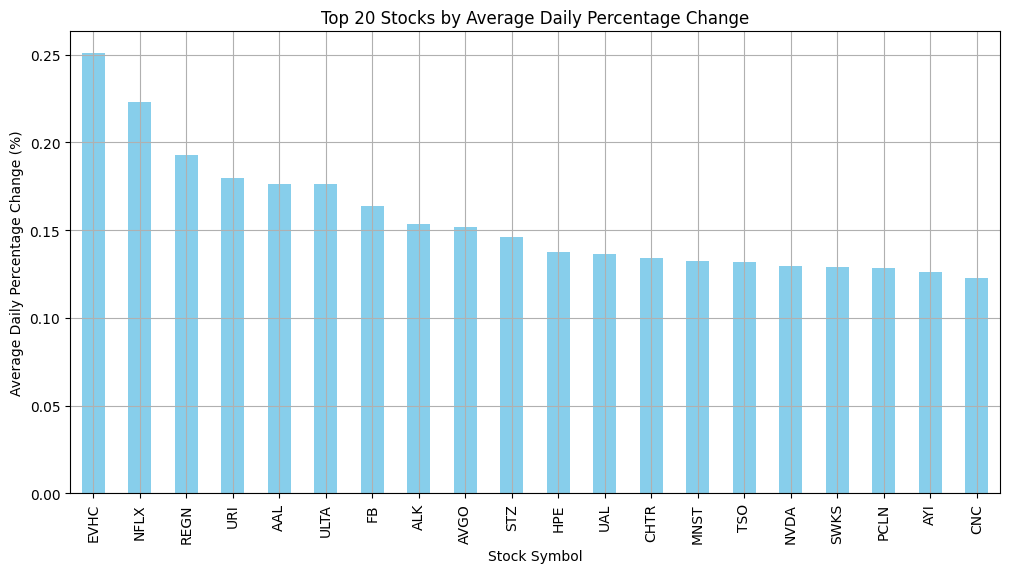

In [ ]:
## Plot 2
def plot_avg_daily_pct_change_per_stock(top_n=20):
    df_prices = stock_daily_percent_change()

    # Remove any null or values that don't exist
    df_prices_clean = df_prices[np.isfinite(df_prices['daily_pct_change'])]

    avg_daily_change = df_prices_clean.groupby('symbol')['daily_pct_change'].mean().sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    avg_daily_change.head(top_n).plot(kind='bar', color='skyblue')
    plt.title(f'Top {top_n} Stocks by Average Daily Percentage Change')
    plt.ylabel('Average Daily Percentage Change (%)')
    plt.xlabel('Stock Symbol')
    plt.grid(True)
    plt.show()

# Example usage
plot_avg_daily_pct_change_per_stock(20)


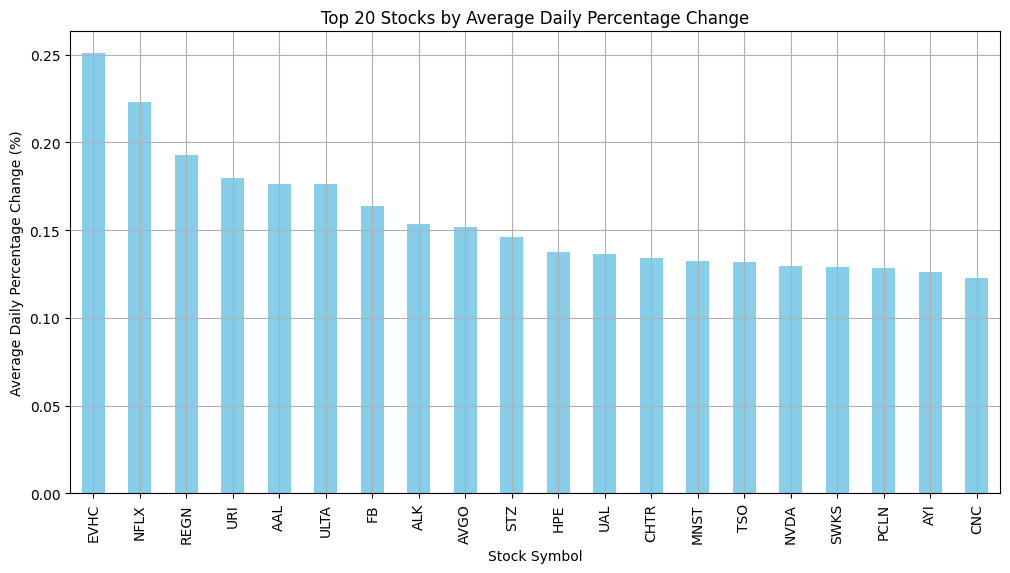

I was curious to see which stocks had the highest average percent change and found LVLT to be the highest percent change. This most likely is because of the outlier that I found where LVLT had a percent change in the thousands which brought up their average change much higher. I wonder if the other stocks also had days that skyrocketed their stock percieved average change. This is unlikely to me because the average daily percent change for most of the stocks fall below 0.2.

Further work can be done in removing outliers for this class and plotting stocks. This result is not suprising to me though, as most of the stocks in the dataset are well established bigger stocks that do not change drastically often.

After changing the analysis to adjusted stock prices, I found different results which makes much more sense with the stock prices.

EVHC is the new stock that has the highest rate of change.

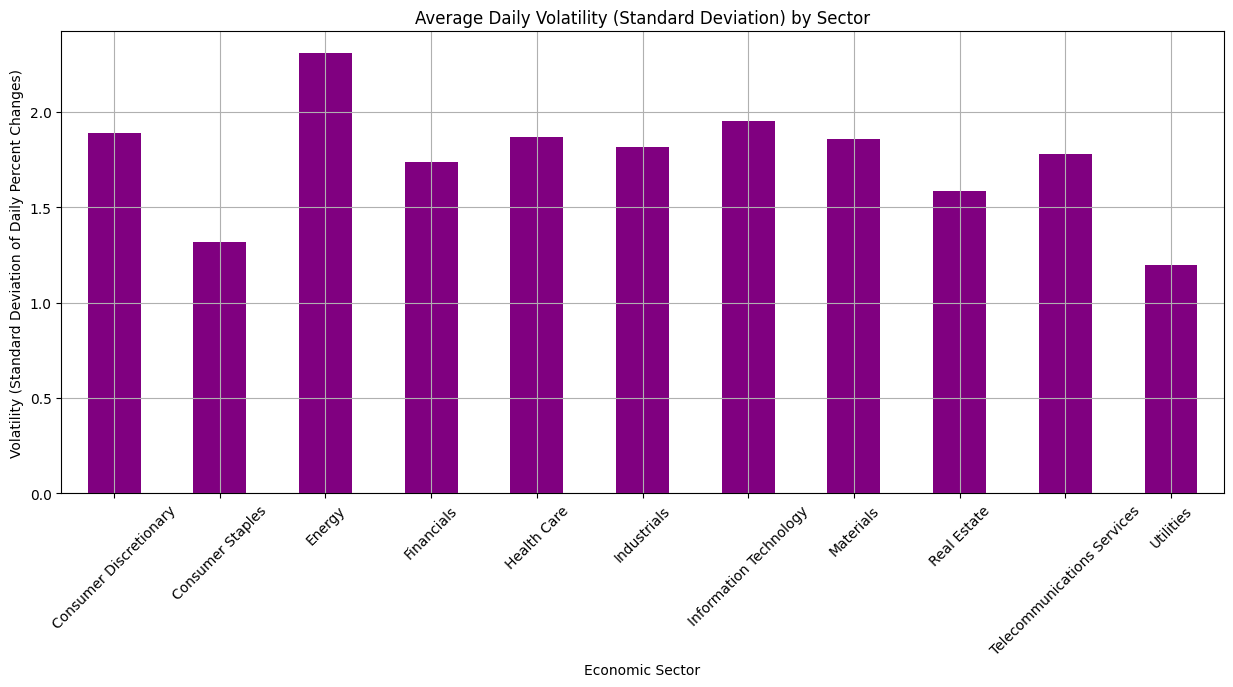

In [ ]:
## Plot 3
def plot_avg_volatility_by_sector():
    df_prices = stock_daily_percent_change()
    df_securities = pd.read_csv('securities.csv')

    # Merge on symbol and check the sector it is.
    df_prices = pd.merge(df_prices, df_securities[['Ticker symbol', 'GICS Sector']],
                         left_on='symbol', right_on='Ticker symbol', how='left')

    df_prices_clean = df_prices[np.isfinite(df_prices['daily_pct_change'])]

    sector_volatility = df_prices_clean.groupby('GICS Sector')['daily_pct_change'].std()

    plt.figure(figsize=(15, 6))
    sector_volatility.plot(kind='bar', color='purple')
    plt.title('Average Daily Volatility (Standard Deviation) by Sector')
    plt.ylabel('Volatility (Standard Deviation of Daily Percent Changes)')
    plt.xlabel('Economic Sector')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Example usage
plot_avg_volatility_by_sector()


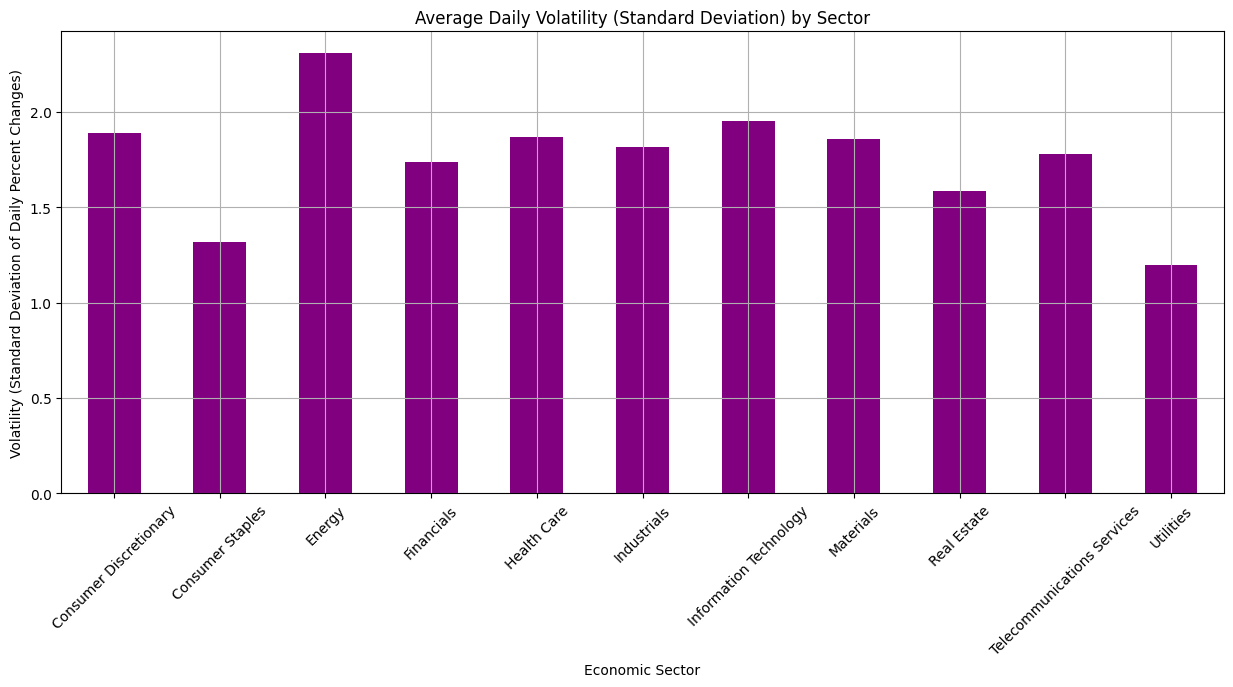

I was curious on what sectors had the most volatility, so I implemented this code to list all of the different sectors with the volatility which I defined as the standard deviation of daily % changes. I found that Telecommunications services dominated this chart. I believed this was because LVLT falled under this category, which I found to be right.

LVLT is a Telecommunications Services company which most likely is the reason why the value appears to high. Additionally the second highest sector was Financials, and I found that ETFC was a company in the Financial sector which explains that jump as well.

After changing the analysis to adjusted stock prices, I found different results which makes much more sense with the stock prices. Energy is revealed to be the sector with the highest fluctuations in price.

## **Q7: Predicting Earnings Per Share - Linear Regression (10 Points)**
The foundations.csv file contains four years worth of profitability data on each of the companies.   Perhaps the most important number to reflect how profitable the company is the earnings per share.    There are two predictive tasks here:
<ol type="i">
<li> Use linear regression to predict the earnings per share for company X in year Y using the other variables from foundations.csv for year Y. </li>
<li> Use linear regressions to predict the earnings per share for company X in year Y using the variables from foundations.csv for year Y-1.</li>
</ol>

How good are these models and how can you tell?


### **Task i**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the data and remove any null values
fundamentals = pd.read_csv('fundamentals.csv')
fundamentals_cleaned = fundamentals.dropna()

def train_universal_model(fundamentals_cleaned):
    features = fundamentals_cleaned.drop(columns=['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Earnings Per Share'])
    target = fundamentals_cleaned['Earnings Per Share']

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    print(f"R^2 score for universal model (Year Y prediction):", r2)
    return model

universal_model_y = train_universal_model(fundamentals_cleaned)



R^2 score for universal model (Year Y prediction): 0.28985370763144924


R^2 score for universal model (Year Y prediction): 0.28985370763144924

### **Task ii**

In [ ]:
def train_universal_model_year_y_minus_1(fundamentals_cleaned):
    shifted_data = fundamentals_cleaned.groupby('Ticker Symbol').shift(1)

    shifted_data['Ticker Symbol'] = fundamentals_cleaned['Ticker Symbol']

    shifted_data = shifted_data.dropna()

    features = shifted_data.drop(columns=['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Earnings Per Share'])
    target = fundamentals_cleaned['Earnings Per Share'].loc[shifted_data.index]

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    print(f"R^2 score for universal model (Year Y-1 prediction):", r2)
    return model

universal_model_y_minus_1 = train_universal_model_year_y_minus_1(fundamentals_cleaned)



R^2 score for universal model (Year Y-1 prediction): 0.09799991887804815


R^2 score for universal model (Year Y-1 prediction): 0.13369764640123538

In [ ]:
# TESTING model on a ticker

def test_model_on_stock(model, fundamentals_cleaned, stock_ticker):
    stock_data = fundamentals_cleaned[fundamentals_cleaned['Ticker Symbol'] == stock_ticker]

    features = stock_data.drop(columns=['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Earnings Per Share'])
    actual_eps = stock_data['Earnings Per Share']

    predicted_eps = model.predict(features)

    r2 = r2_score(actual_eps, predicted_eps)

    print(f"R^2 score for {stock_ticker}: {r2}")
    return predicted_eps, actual_eps

# Test the universal model on a specific stock ticker
stock_ticker = 'AAPL'  # Example stock ticker
test_model_on_stock(universal_model_y, fundamentals_cleaned, stock_ticker)
test_model_on_stock(universal_model_y_minus_1, fundamentals_cleaned, stock_ticker)

R^2 score for AAPL: 0.43678325605940704
R^2 score for AAPL: 0.1447542356404382


(array([15.71783562,  6.6319004 , 17.43750534,  9.84126465]),
 8     40.03
 9      6.49
 10     9.28
 11     8.35
 Name: Earnings Per Share, dtype: float64)

R^2 score for AAPL: 0.43678325605940704

R^2 score for AAPL: 0.1447542356404382

(array([15.71783562,  6.6319004 , 17.43750534,  9.84126465]),

 8     40.03
 9      6.49
 10     9.28
 11     8.35

 Name: Earnings Per Share, dtype: float64)

Conclusion for Q7: \[Write here\]

In both models, I made sure to clean the fundamentals a little bit to drop any information that does not contribute to earnings per share. This was the first column, the stock ticker symbol, and the period ending. I also had to drop earnings per share as that is our target.

For the first model, I split it into training and testing data with 0.8 of the features being training and 0.2 being testing and ran Linear Regression to yield a not so good R^2 value of 0.29.

In the second model, I shifted all the values that were in the same ticker symbol down by one so that each row has information of the previous year which explains my shifted data frame.

I also implemented a testing function to be able to test models on a specific ticker

## **Q8: Advanced Modeling Techniques (10 Points)**
Now repeat this exercise to try to build better models for parts i and ii.    I bet that (hint) improved data preparation/normalization/feature engineering will help.  Maybe an algorithm other than linear regression (e.g. Random Forest, Nearest Neighbor, etc) will prove better training.

\[Note: [scikit-learn](https://scikit-learn.org/stable/) is a user-friendly library which is used to perform data loading, pre-processing, transformations, algorithms and metrics needed for Data Science and Machine learning\]  

Compare their performance and explain your reasoning for the differences in their performances.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Load the data and remove any null values
fundamentals = pd.read_csv('fundamentals.csv')
fundamentals_cleaned = fundamentals.dropna()

# List of columns that we want to normalize
columns_to_normalize = ['Total Revenue', 'Net Income', 'Cost of Revenue', 'Gross Profit']

def feature_engineering(df):
    df = df.copy()

    # I did some research on what I could find and I also asked Chat GPT with the prompt of all the columns of fundamentals.csv and asked what feature engineering I could do to combine

    ##BEGIN[ChatGPT GPT-4][https://chat.openai.com/auth/login]
    df['Revenue_to_Profit'] = np.where(df['Net Income'] != 0, df['Total Revenue'] / df['Net Income'], 0)
    df['Profit_to_Cost'] = np.where(df['Cost of Revenue'] != 0, df['Net Income'] / df['Cost of Revenue'], 0)
    df['Gross_Margin'] = np.where(df['Total Revenue'] != 0, df['Gross Profit'] / df['Total Revenue'], 0)

    df['Revenue_Growth'] = df.groupby('Ticker Symbol')['Total Revenue'].pct_change().fillna(0)
    df['Profit_Growth'] = df.groupby('Ticker Symbol')['Net Income'].pct_change().fillna(0)

    #END[ChatGPT GPT-4]

    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.fillna(0, inplace=True)

    return df

def train_universal_model(fundamentals_cleaned):
    features = feature_engineering(fundamentals_cleaned)

    features = features.drop(columns=['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Earnings Per Share'])
    target = fundamentals_cleaned['Earnings Per Share']

    scaler = StandardScaler()
    features[columns_to_normalize] = scaler.fit_transform(features[columns_to_normalize])

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100),
        'KNN': KNeighborsRegressor(n_neighbors=5),
    }

    trained_models = {}

    # Train and evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print(f"R^2 score for {name} (Year Y prediction):", r2)
        trained_models[name] = model

    return trained_models, scaler

def train_universal_model_year_y_minus_1(fundamentals_cleaned):
    shifted_data = fundamentals_cleaned.groupby('Ticker Symbol').shift(1)

    shifted_data['Ticker Symbol'] = fundamentals_cleaned['Ticker Symbol']

    shifted_data = shifted_data.dropna()

    features = feature_engineering(shifted_data)

    features = features.drop(columns=['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Earnings Per Share'], errors='ignore')

    scaler = StandardScaler()
    features[columns_to_normalize] = scaler.fit_transform(features[columns_to_normalize])

    target = fundamentals_cleaned['Earnings Per Share'].loc[shifted_data.index]

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100),
        'KNN': KNeighborsRegressor(n_neighbors=5),
    }

    trained_models = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        print(f"R^2 score for {name} (Year Y-1 prediction):", r2)
        trained_models[name] = model

    return trained_models, scaler


# Train the models with feature engineering
models_y, scaler_y = train_universal_model(fundamentals_cleaned)
print("----------")
models_y_minus_1, scaler_y_minus_1 = train_universal_model_year_y_minus_1(fundamentals_cleaned)


R^2 score for Linear Regression (Year Y prediction): 0.5524866124015315
R^2 score for Random Forest (Year Y prediction): 0.7185560112356641
R^2 score for KNN (Year Y prediction): 0.46188570060303435
----------
R^2 score for Linear Regression (Year Y-1 prediction): -0.7420342287929107
R^2 score for Random Forest (Year Y-1 prediction): 0.4978095042842008
R^2 score for KNN (Year Y-1 prediction): 0.1332287644358655


In [ ]:
# R^2 score for Linear Regression (Year Y prediction): 0.09056046820603769
# R^2 score for Random Forest (Year Y prediction): 0.8520190880748314
# R^2 score for KNN (Year Y prediction): 0.45656105652927126
# ----------
# R^2 score for Linear Regression (Year Y-1 prediction): -1.9692475261278068
# R^2 score for Random Forest (Year Y-1 prediction): 0.07560985376532103
# R^2 score for KNN (Year Y-1 prediction): 0.031803987805488765

In [ ]:
from sklearn.metrics import r2_score

def test_model(ticker, models, scaler, fundamentals_cleaned):
    ticker_data = fundamentals_cleaned[fundamentals_cleaned['Ticker Symbol'] == ticker]

    features = feature_engineering(ticker_data)

    features = features.drop(columns=['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Earnings Per Share'], errors='ignore')

    features[columns_to_normalize] = scaler.transform(features[columns_to_normalize])

    actual_eps = ticker_data['Earnings Per Share'].values

    for name, model in models.items():
        prediction = model.predict(features)
        r2 = r2_score(actual_eps, prediction)
        print(f"R^2 score for {name} (comparison with actual EPS):", r2)

test_ticker = 'AAPL'
test_model(test_ticker, models_y, scaler_y, fundamentals_cleaned)
print("--------------------------------")
test_model(test_ticker, models_y_minus_1, scaler_y_minus_1, fundamentals_cleaned)


R^2 score for Linear Regression (comparison with actual EPS): 0.680241986995963
R^2 score for Random Forest (comparison with actual EPS): 0.566510918947553
R^2 score for KNN (comparison with actual EPS): -0.10680363788111258
--------------------------------
R^2 score for Linear Regression (comparison with actual EPS): -0.1312175403905227
R^2 score for Random Forest (comparison with actual EPS): -0.41077546079189053
R^2 score for KNN (comparison with actual EPS): -0.3601479840209978


In [ ]:
# R^2 score for Linear Regression (comparison with actual EPS): 0.6865298789278915
# R^2 score for Random Forest (comparison with actual EPS): 0.8371239296835485
# R^2 score for KNN (comparison with actual EPS): -0.048747444896356296
# --------------------------------
# R^2 score for Linear Regression (comparison with actual EPS): -0.49584992275036543
# R^2 score for Random Forest (comparison with actual EPS): -0.46612016242107557
# R^2 score for KNN (comparison with actual EPS): -0.6762510239450781

Conclusion for Q8: [Write here]

I attempted to normalize the data with the scaler on data points that varied widely for different companies such as total revenue, net income, cost of revenue, gross profit. I then applied training with three different models: Linear Regression, Random Forest, KNN and I found that random forest did the best job of R^2 value. I'm not sure if my normalization did much and my feature engineerng did much either as I found similar results in linear regression.

The models were tested on AAPL and I got results that showed Random Forest was doing the best and haveing the best predictions.

I did find the Year-1 model was not performing as well and I wonder if previous years are not a good indication of what will happen in the next year. This makes sense to me as each year, companies try different things, the economy can fluctuate and some years there could be mo correlation at all based off of what happened last year.

## **Submission Guideline:**
- Submit everything through Google classroom. As mentioned above, you will need to upload:
  1. The Jupyter notebook all your work is in (.ipynb file), derived from the provided template
  2. PDF (export the notebook as a pdf file)


- These files should be named with the following format, where the italicized parts should be replaced with the corresponding values:
  1. cse519_hw1_*lastname_firstname_sbuid*.ipynb
  2. cse519_hw1_*lastname_firstname_sbuid*.pdf

Your Submission will  **NOT BE GRADED** if you don't follow the naming convention**❗❗**





Good Luck! 😃